# Relatório Ep 2
### MAC5742 - Programação Concorrente e Paralela
Integrantes
- Gabriel Miranda de Araujo - 10297689
- João Seckler - 4603521
- Liang Shen - 9833509
- Paulo Henrique da Silveira - 7580971

## Introdução

## Metodologia

Dividimos o trabalho em duas partes: o desenvolvimento dos novos códigos paralelos (OMPI) e Híbridos (OMPI + Pthreads, OMPI + OMP), juntamente com sua comparação em relação aos experimentos do EP 1. Conforme solicita o enunciado, executamos os códigos somente com os parâmetros solicitados, e em linguagem C.

Para paralelizar o código sequencial desta vez, foi utilizada a interface MPI open source OMPI, implementada no arquivo mandelbrot_ompi.c. Amplamente difundida, essa interface nos permite distribuir tarefas do código para serem executadas por diversos processos diferentes.

As implementações de códigos híbridos, consistindo na combinação da já discutida OMPI com as interfaces Pthreads e OMP, e presente nos respectivos arquivos mandelbrot_ompi_pth.c e mandelbrot_ompi_omp.c, combinam a divisão de tarefas por processos da OMPI com o multithreading da OMP/Pthreads, com relativamente poucas linhas a mais do que suas contrapartidas paralelas.

Por fim, todas as versões do algoritmo foram avaliadas em uma máquina que possui o processador AMD Ryzen 5 3500X 6-Core e 8GB de memória RAM. A medição do desempenho dos códigos consistiu em anotações do tempo de execução do programa compilado para apenas a região triple spiral valley, variando o número de threads e processos, mantendo o tamanho de entrada constante, repetindo 15 vezes e calculando ao final o tempo médio das repetições e seu desvio padrão.

## Resultados e análises

### MPI (1 + OMP + Pthreads)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
ompi = pd.read_csv("results/mandelbrot_ompi/triple_spiral.csv")
ompi_omp = pd.read_csv("results/mandelbrot_ompi_omp/triple_spiral.csv")
ompi_pth = pd.read_csv("results/mandelbrot_ompi_pth/triple_spiral.csv")
pth = pd.read_csv("results/mandelbrot_pth/triple_spiral.csv")
seq = pd.read_csv("results/mandelbrot_seq/triple_spiral.csv")
omp = pd.read_csv("results/mandelbrot_omp/triple_spiral.csv")

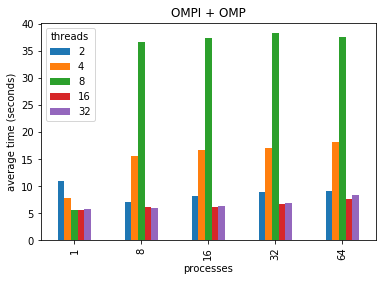

In [28]:
ompi_omp.pivot(index='processes',columns='threads',values='avg_time').plot(kind='bar',ylabel='average time (seconds)',title='OMPI + OMP')
plt.show()

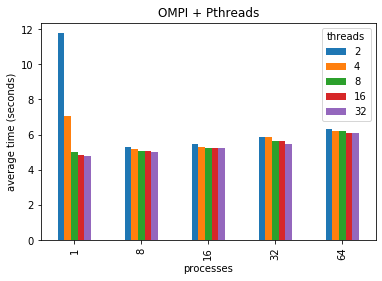

In [29]:
ompi_pth.pivot(index='processes',columns='threads',values='avg_time').plot(kind='bar',ylabel='average time (seconds)',title='OMPI + Pthreads')
plt.show()

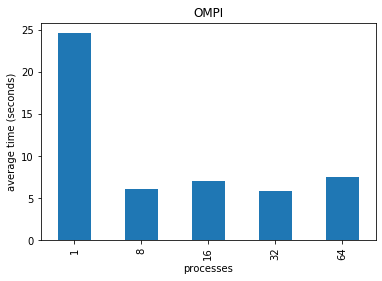

In [30]:
ompi.pivot(index='processes',columns='threads',values='avg_time').plot(kind='bar',ylabel='average time (seconds)',legend=False,title='OMPI')
plt.show()

### Experimentos do EP1: Pthreads, OMP e Sequencial

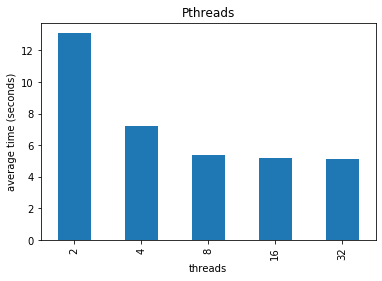

In [31]:
pth.plot(kind='bar',x='threads',y='avg_time',ylabel='average time (seconds)',legend=False,title='Pthreads')
plt.show()

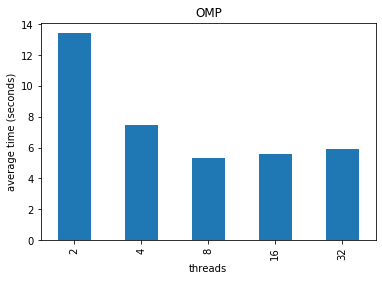

In [32]:
omp.plot(kind='bar',x='threads',y='avg_time',ylabel='average time (seconds)',legend=False, title='OMP')
plt.show()

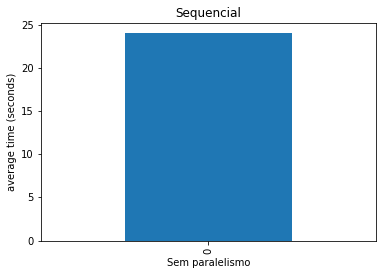

In [36]:
seq.plot(kind='bar',y='avg_time',ylabel='average time (seconds)',legend=False, title='Sequencial',xlabel='Sem paralelismo')
plt.show()

## Conclusão